In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras


In [2]:
#데이터 가져오기

data = pd.read_excel("D:/Son/3-2/deeplearning/report/dataset/Raisin_Dataset/Raisin_Dataset.xlsx")
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [4]:
#결측치 확인

data.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [5]:
#라벨은 class

y=data.Class.values
x=data.drop('Class',axis=1)

x, y

(      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
 0    87524       442.246011       253.291155      0.819738       90546   
 1    75166       406.690687       243.032436      0.801805       78789   
 2    90856       442.267048       266.328318      0.798354       93717   
 3    45928       286.540559       208.760042      0.684989       47336   
 4    79408       352.190770       290.827533      0.564011       81463   
 ..     ...              ...              ...           ...         ...   
 895  83248       430.077308       247.838695      0.817263       85839   
 896  87350       440.735698       259.293149      0.808629       90899   
 897  99657       431.706981       298.837323      0.721684      106264   
 898  93523       476.344094       254.176054      0.845739       97653   
 899  85609       512.081774       215.271976      0.907345       89197   
 
        Extent  Perimeter  
 0    0.758651   1184.040  
 1    0.684130   1121.786  
 2    0.637613

In [6]:
#데이터 정규화
x=(x-np.min(x,0))/(np.max(x,0)-np.min(x,0))

x

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.296370,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791
1,0.237427,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842
2,0.312263,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594
3,0.097973,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284
4,0.257660,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493
...,...,...,...,...,...,...,...
895,0.275975,0.264945,0.298733,0.763836,0.236831,0.634192,0.245347
896,0.295540,0.278757,0.331595,0.749761,0.256905,0.563259,0.286325
897,0.354240,0.267056,0.445044,0.608017,0.317858,0.792897,0.324126
898,0.324983,0.324902,0.316915,0.810259,0.283698,0.612254,0.307635


In [7]:
#object타입을 라벨인코딩하여 정수로 변환

from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
y=label.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
#라벨을 원핫인코딩

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values

Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [9]:
#test와 train 데이터로 나눔

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x,Y,test_size=0.2,random_state=0) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(720, 7)
(180, 7)
(720, 2)
(180, 2)


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(7,input_shape=(7,),activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(0.01),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 64)                960       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 3,770
Trainable params: 3,770
Non-trainabl

In [11]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=10,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
72/72 [==============================] - 1s 4ms/step - loss: 0.5049 - accuracy: 0.7181 - val_loss: 0.4124 - val_accuracy: 0.8500
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.8069 - val_loss: 0.3740 - val_accuracy: 0.8778
Epoch 3/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8347 - val_loss: 0.3458 - val_accuracy: 0.8722
Epoch 4/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8403 - val_loss: 0.3459 - val_accuracy: 0.8778
Epoch 5/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8542 - val_loss: 0.3460 - val_accuracy: 0.8556
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8458 - val_loss: 0.3625 - val_accuracy: 0.8611
Epoch 7/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8403 - val_loss: 0.3561 - val_accuracy: 0.9000
Epoch 8/100
7

Epoch 59/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8486 - val_loss: 0.3231 - val_accuracy: 0.8944
Epoch 60/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.8403 - val_loss: 0.3338 - val_accuracy: 0.8722
Epoch 61/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8569 - val_loss: 0.3213 - val_accuracy: 0.8833
Epoch 62/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8417 - val_loss: 0.3325 - val_accuracy: 0.8833
Epoch 63/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8472 - val_loss: 0.3254 - val_accuracy: 0.8944
Epoch 64/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8542 - val_loss: 0.3319 - val_accuracy: 0.8778
Epoch 65/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8667 - val_loss: 0.3881 - val_accuracy: 0.8722
Epoch 

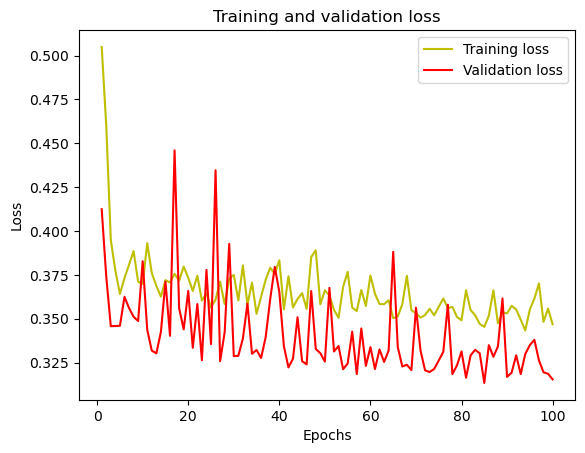

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

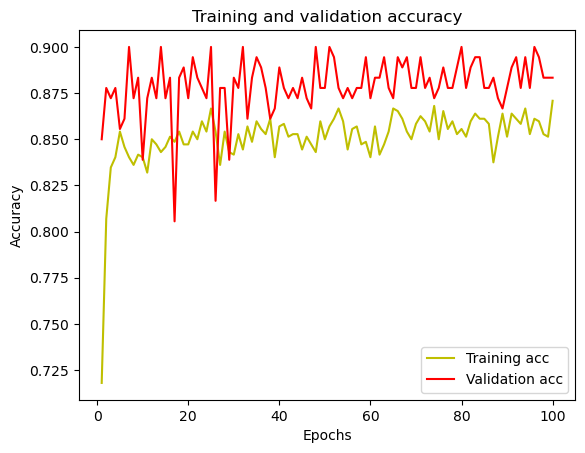

In [13]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
#Accuracy of the predicted values

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        97
           1       0.88      0.87      0.87        83

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180

[[87 10]
 [11 72]]


In [15]:
#Convolution Layer

from keras.models import Sequential, Model
from keras.layers import Conv1D, Dense, Input, GlobalMaxPooling1D, Flatten

input = Input(shape = (7,1))
conv = Conv1D(filters = 128, kernel_size = 2, padding = "valid", strides = 1, activation = "relu")(input)
flat = Flatten()(conv)
hidden = Dense(32, activation="relu")(flat)       
output = Dense(2, activation="softmax")(hidden) 
model_CNN = Model(input, output)
model_CNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 conv1d (Conv1D)             (None, 6, 128)            384       
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                24608     
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 25,058
Trainable params: 25,058
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_CNN.compile(Adam(0.01),'categorical_crossentropy',metrics=['accuracy'])

model_CNN_history=model_CNN.fit(x=X_train, y=y_train, epochs=100, batch_size=10,validation_data= (X_test,y_test))
y_pred = model_CNN.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
72/72 [==============================] - 1s 4ms/step - loss: 0.4965 - accuracy: 0.7417 - val_loss: 0.4749 - val_accuracy: 0.8167
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8306 - val_loss: 0.4689 - val_accuracy: 0.7944
Epoch 3/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8403 - val_loss: 0.3546 - val_accuracy: 0.8889
Epoch 4/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8250 - val_loss: 0.3641 - val_accuracy: 0.8889
Epoch 5/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8472 - val_loss: 0.4186 - val_accuracy: 0.8333
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8542 - val_loss: 0.3474 - val_accuracy: 0.8778
Epoch 7/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8569 - val_loss: 0.3379 - val_accuracy: 0.8889
Epoch 8/100
7

Epoch 59/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8583 - val_loss: 0.3325 - val_accuracy: 0.8611
Epoch 60/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8514 - val_loss: 0.2823 - val_accuracy: 0.8833
Epoch 61/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8569 - val_loss: 0.2759 - val_accuracy: 0.8944
Epoch 62/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8583 - val_loss: 0.2691 - val_accuracy: 0.9056
Epoch 63/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8542 - val_loss: 0.2934 - val_accuracy: 0.9000
Epoch 64/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8458 - val_loss: 0.2806 - val_accuracy: 0.8944
Epoch 65/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8583 - val_loss: 0.2839 - val_accuracy: 0.8889
Epoch 

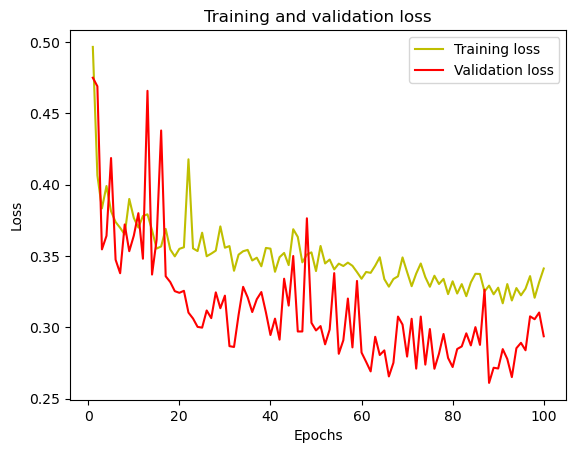

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_CNN_history.history['loss']
val_loss =model_CNN_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

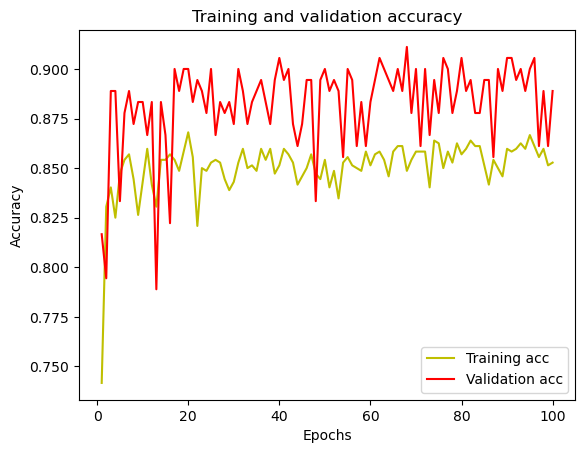

In [18]:
acc =model_CNN_history.history['accuracy']
val_acc =model_CNN_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
#Accuracy of the predicted values

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        97
           1       0.87      0.89      0.88        83

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180

[[86 11]
 [ 9 74]]


In [20]:
#LSTM
from keras.models import Sequential, Model
from keras.layers import Dense, Input, LSTM

In [21]:
#모델의 입력데이터에 맞게 데이터크기 변형

x_data = []                         # 입력데이터 리스트
y_data = []                         # 출력데이터 리스트
x_np=x.to_numpy()

for i in range(1, len(data) - 5) :   
  x_lstm = x_np[i : i + 5, : ] 
  y_lstm = Y[i + 5, : ]        
  x_data.append(x_lstm)              
  y_data.append(y_lstm)

x_data = np.array(x_data)
y_data = np.array(y_data)

print(x_data.shape)
print(y_data.shape)

(894, 5, 7)
(894, 2)


In [22]:
print(x_data[0])                # 첫번쩨 입력 데이타
print(y_data[0])                # 첫번째 리벨

[[0.23742726 0.23463777 0.28494465 0.73863618 0.20886392 0.66785449
  0.24184205]
 [0.31226271 0.2807413  0.35177845 0.73300911 0.26808369 0.56575414
  0.28359405]
 [0.09797291 0.0789348  0.18662023 0.54819437 0.08408905 0.70180942
  0.10828416]
 [0.25766002 0.16401114 0.4220645  0.35096758 0.21947175 0.90631526
  0.21849309]
 [0.11377945 0.11986572 0.16183881 0.6987696  0.1000841  0.61150395
  0.12640817]]
[0 1]


In [23]:
#test와 train 데이터로 나눔

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=0) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(715, 5, 7)
(179, 5, 7)
(715, 2)
(179, 2)


In [24]:
#모델 설계

inputs = Input(shape=(5, 7))
lstm_layer = LSTM(64)(inputs) 
hidden1 = Dense(128, activation='relu')(lstm_layer)
outputs = Dense(2, activation='softmax')(hidden1)
model_LSTM = Model(inputs = inputs, outputs = outputs)
model_LSTM.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 7)]            0         
                                                                 
 lstm (LSTM)                 (None, 64)                18432     
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                                 
Total params: 27,010
Trainable params: 27,010
Non-trainable params: 0
_________________________________________________________________


In [25]:
#모델 학습

model_LSTM.compile(Adam(0.01),'categorical_crossentropy',metrics=['accuracy'])

model_LSTM_history=model_LSTM.fit(x=X_train, y=y_train, epochs=100, batch_size=10,validation_data= (X_test,y_test))
y_pred = model_LSTM.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
72/72 [==============================] - 2s 11ms/step - loss: 0.3011 - accuracy: 0.8643 - val_loss: 0.0773 - val_accuracy: 0.9888
Epoch 2/100
72/72 [==============================] - 0s 4ms/step - loss: 0.1064 - accuracy: 0.9678 - val_loss: 0.1141 - val_accuracy: 0.9441
Epoch 3/100
72/72 [==============================] - 0s 4ms/step - loss: 0.1129 - accuracy: 0.9664 - val_loss: 0.0569 - val_accuracy: 0.9777
Epoch 4/100
72/72 [==============================] - 0s 4ms/step - loss: 0.1163 - accuracy: 0.9622 - val_loss: 0.0932 - val_accuracy: 0.9777
Epoch 5/100
72/72 [==============================] - 0s 4ms/step - loss: 0.0857 - accuracy: 0.9734 - val_loss: 0.0623 - val_accuracy: 0.9777
Epoch 6/100
72/72 [==============================] - 0s 4ms/step - loss: 0.0894 - accuracy: 0.9734 - val_loss: 0.1031 - val_accuracy: 0.9665
Epoch 7/100
72/72 [==============================] - 0s 4ms/step - loss: 0.0825 - accuracy: 0.9804 - val_loss: 0.0718 - val_accuracy: 0.9777
Epoch 8/100


72/72 [==============================] - 0s 4ms/step - loss: 1.8962e-04 - accuracy: 1.0000 - val_loss: 0.0981 - val_accuracy: 0.9832
Epoch 59/100
72/72 [==============================] - 0s 4ms/step - loss: 1.5626e-04 - accuracy: 1.0000 - val_loss: 0.1021 - val_accuracy: 0.9832
Epoch 60/100
72/72 [==============================] - 0s 4ms/step - loss: 1.2099e-04 - accuracy: 1.0000 - val_loss: 0.1051 - val_accuracy: 0.9832
Epoch 61/100
72/72 [==============================] - 0s 4ms/step - loss: 9.9304e-05 - accuracy: 1.0000 - val_loss: 0.1058 - val_accuracy: 0.9832
Epoch 62/100
72/72 [==============================] - 0s 4ms/step - loss: 8.3097e-05 - accuracy: 1.0000 - val_loss: 0.1074 - val_accuracy: 0.9832
Epoch 63/100
72/72 [==============================] - 0s 4ms/step - loss: 7.0098e-05 - accuracy: 1.0000 - val_loss: 0.1093 - val_accuracy: 0.9832
Epoch 64/100
72/72 [==============================] - 0s 4ms/step - loss: 5.9768e-05 - accuracy: 1.0000 - val_loss: 0.1097 - val_accuracy

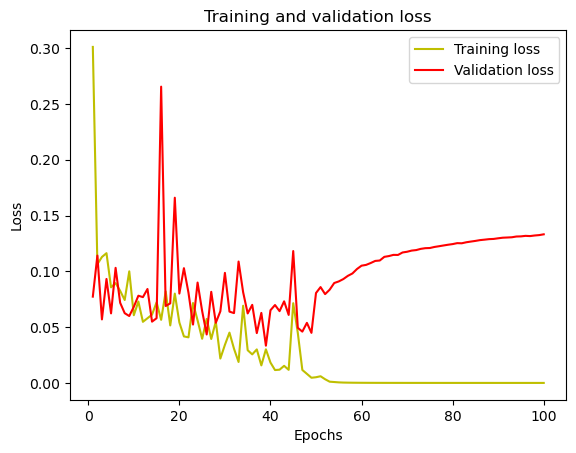

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_LSTM_history.history['loss']
val_loss =model_LSTM_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

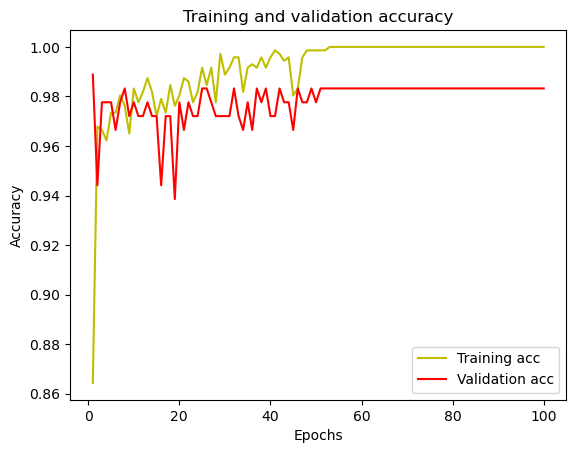

In [27]:
acc =model_LSTM_history.history['accuracy']
val_acc =model_LSTM_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
#Accuracy of the predicted values

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.98      0.99      0.98        89

    accuracy                           0.98       179
   macro avg       0.98      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179

[[88  2]
 [ 1 88]]
